In [1]:
import matplotlib
import sys
sys.path.append('..')
from scipy import signal, stats, io
from tmfc_simulation.wilson_cowan_task_simulation import WCTaskSim, HRF
from tmfc_simulation.boldIntegration import simulateBOLD
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 16
plt.rcParams['image.cmap'] = 'plasma'
np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

## SetUp 
Generate activation as a delta function at first moment in each node

In [5]:
#number of nodes
N = 100
#time step
dt = 10e-4
#time length (in seconds)
length = 25
onset = 0
duration = 10e-4
activation = np.zeros((N, int(length / dt)))
activation[:, int(onset / dt):int((onset + duration) / dt)] = 1

## BW params setup
Balloon-Windkessel model parameters (from Friston 2003)

In [14]:
normalize_max = 1.0
activation = normalize_max * activation
BOLD, X, F, Q, V = simulateBOLD(activation,
                                dt,
                                alpha = (0.32, 0.0015),
                                rho=(0.34, 0.0024),
                                tau=(0.98, 0.0568),
                                gamma=(0.41, 0.002),
                                k = (0.65, 0.015),
                                fix=False)

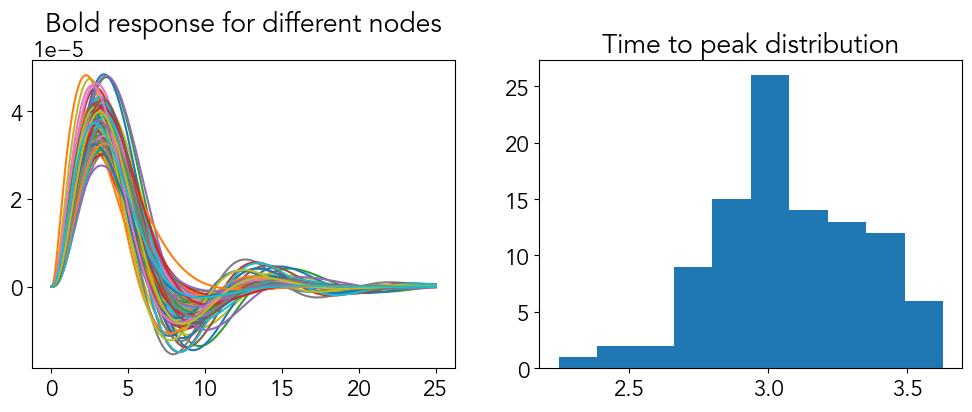

In [15]:
time = np.linspace(0, length, int(length/dt))
time_to_peaks = [time[np.argmax(BOLD[i])] for i in range(N)]
plt.figure(figsize=(12,4))
plt.subplot(121);
plt.plot(time, BOLD.T); plt.title('Bold response for different nodes')
plt.subplot(122);
plt.hist(time_to_peaks); plt.title('Time to peak distribution');
